In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm, shapiro
import warnings
warnings.filterwarnings('ignore')

In [37]:
def VaRHistorical(data, alpha=0.99):
    data['returns'] = data['Close'].diff(1)
    data = data.dropna()
    return -data['returns'].quantile(1-alpha)

def VaRAnalytical(data, alpha=0.99):
    data['returns'] = data['Close'].diff(1)
    mean = data['returns'].mean()
    std = data['returns'].std()
    
    # return -norm.ppf(1-alpha, mean, std)
    return -(-mean + std * (norm.ppf(1-alpha)))

In [38]:
data = yf.download('AMZN', '2020-01-01', '2022-01-01')
data = data[['Close']]
data

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2020-01-02,94.900497
2020-01-03,93.748497
2020-01-06,95.143997
2020-01-07,95.343002
2020-01-08,94.598503
...,...
2021-12-27,169.669495
2021-12-28,170.660995
2021-12-29,169.201004


Text(0.5, 1.0, 'AMZN')

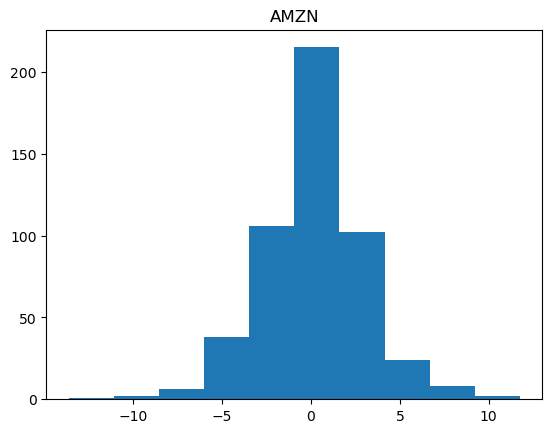

In [39]:
plt.hist(data['Close'].diff(1))
plt.title('AMZN')

In [40]:
shapiro(data['Close'])

ShapiroResult(statistic=0.825892984867096, pvalue=5.0963352195288406e-23)

In [41]:
shapiro(data['Close'].diff(1))

ShapiroResult(statistic=nan, pvalue=1.0)

In [42]:
alphas = [0.99, 0.95, 0.9]
for alpha in alphas:
    print(f'Alpha: {alpha}, VaR {VaRHistorical(data, alpha)}')

Alpha: 0.99, VaR 7.238203506469726
Alpha: 0.95, VaR 4.674851989746093
Alpha: 0.9, VaR 3.3742095947265627


In [43]:
for alpha in alphas:
    print(f'Alpha: {alpha}, VaR {VaRAnalytical(data, alpha)}')

Alpha: 0.99, VaR 6.8319982259509775
Alpha: 0.95, VaR 4.87233460756382
Alpha: 0.9, VaR 3.8276451838969154


In [54]:
def expectedShortfall(data, alpha=.99):
    data['returns'] = data['Close'].diff(1)
    std = data['returns'].std()
    mean = data['returns'].mean()
    return (norm.pdf(norm.ppf(1-alpha))/(1-alpha)) * std - mean

def expectedShortfallH(data, alpha=.99):
    rets = data['Close'].diff(1)
    belowVar = rets[rets < -VaRHistorical(data, alpha)]
    return -belowVar.mean()

In [55]:
for alpha in alphas:
    print(f'Alpha: {alpha} ES: {expectedShortfall(data, alpha)}')

Alpha: 0.99 ES: 7.521435683531707
Alpha: 0.95 ES: 5.788919079306577
Alpha: 0.9 ES: 4.904030784398967


In [56]:
for alpha in alphas:
    print(f'Alpha: {alpha} ES: {expectedShortfallH(data, alpha)}')

Alpha: 0.99 ES: 9.258417765299479
Alpha: 0.95 ES: 6.184327932504507
Alpha: 0.9 ES: 5.0573235306085325


In [57]:
data2 = yf.download('WMT', '2020-01-01', '2022-01-01')
data2 = data2[['Close']]
data2

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2020-01-02,118.940002
2020-01-03,117.889999
2020-01-06,117.650002
2020-01-07,116.559998
2020-01-08,116.160004
...,...
2021-12-27,140.759995
2021-12-28,142.779999
2021-12-29,142.710007


Text(0.5, 1.0, 'Walmart')

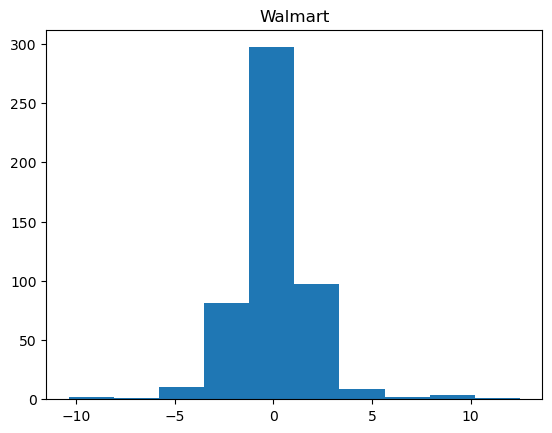

In [58]:
plt.hist(data2['Close'].diff(1))
plt.title('Walmart')

In [59]:
shapiro(data2['Close'].diff(1))

ShapiroResult(statistic=nan, pvalue=1.0)

In [60]:
for alpha in alphas:
    print(f'Alpha: {alpha}, VaR {VaRHistorical(data2, alpha)}')

Alpha: 0.99, VaR 5.336900482177731
Alpha: 0.95, VaR 2.6905059814453094
Alpha: 0.9, VaR 1.9869918823242188


In [61]:
for alpha in alphas:
    print(f'Alpha: {alpha}, VaR {VaRAnalytical(data2, alpha)}')

Alpha: 0.99, VaR 4.6675685317479
Alpha: 0.95, VaR 3.3151900973293613
Alpha: 0.9, VaR 2.594242158113635


In [62]:
for alpha in alphas:
    print(f'Alpha: {alpha} ES: {expectedShortfall(data2, alpha)}')

Alpha: 0.99 ES: 5.2378429362733465
Alpha: 0.95 ES: 4.042220345313345
Alpha: 0.9 ES: 3.4315523532794083


In [63]:
for alpha in alphas:
    print(f'Alpha: {alpha} ES: {expectedShortfallH(data2, alpha)}')

Alpha: 0.99 ES: 7.288330078125
Alpha: 0.95 ES: 4.303461808424729
Alpha: 0.9 ES: 3.302940667844286
